# Tutorial for the *CYCLUS* Fuel Cycle Simulator

[*CYCLUS*](http://fuelcycle.org/) is an open soruce fuel cycle simulator.  It is agent-based, and its user-customizable archetypes (called <font color='800000'>prototypes</font>) allow for more freedom in the fidelity, depth, and focus of the simulation.
<br><br>
This tutorial will begin with a simple exercise using Cycamore archetypes to familiarize the user with creating input files (in xml) and accessing data from the SQLite database output.  This tutorial is not an [exhaustive list](http://fuelcycle.org/user/index.html) of ways to do these things, but it should give new users a good starting point.

In [1]:
# This cell requires user input.  Run it when you have entered everything.
from pyne import nucname
duration = 720
start_month = 1
start_year = 2018
decay = 'never'

simulation_parameters = [duration,start_month,start_year,decay]

In [2]:
# This cell does not need user input, and you can run it now.

fresh_id = [92235,92238]
fresh_comp = [0.04, 0.96]

spent_id = [92235, 92238, 94239, 55137]
spent_comp = [0.011, 0.94, 0.009, 0.04]

#import basics
import cywrite
import analysis
import cymetric as cym
import cymetric_analysis
import matplotlib.pyplot as plt
import numpy as np
# the function that will write the input takes in a dictionary for fresh and spent fuels, so
# below a function that will take the raw ID and composition data and put them in this format is called.
#fresh,spent = basics.recipe_dict(fresh_id,fresh_comp,spent_id,spent_comp)

fresh,spent = cywrite.recipe(fresh_id,fresh_comp,spent_id,spent_comp)

# we can look at these dictionaries to see how they are formatted:
print(fresh)
print(spent)
analysis

ModuleNotFoundError: No module named 'cywrite'

The recipe for natural uranium has already been included in the template.

### Providing Reactor Data:

<font size='2'>Note: For the purposes of the tutorial, we'll input reactor information here in the notebook, then render it into a csv file and import it again.  Obviously, this isn't needed - we could directly input our reactor data and never bother with external files.  However, we're including this step to help new users who may be unfamiliar with python with one of many ways to import external data.</font>
<br><br>

Exercise 1 models a single PWR.  It has a power capacity of 1000 MWe, and there is only one of them in the region.  Fill in the missing information.

### Run the Simulation:
*CYCLUS* can be run using a single terminal command, given below.  The cell will run this command for you, but it's also possible to remove the ! and directly run it in the terminal

First, a cursor that points to the sqlite file is created:

In [3]:
cur = analysis.cursor('singlereactortutorial.sqlite')
ev  = cymetric_analysis.evaluator('singlereactortutorial.sqlite')

plot_in_out_flux will plot the material coming into or out of the prototype of choice, and allows for cumulative and total plotting options.  For example, setting the influx boolean to true, cumulative to true, and total to true adds up all the isotopes cumulatively at each timestep for materials entering the reactor.  This creates a plot of cumulative fuel into reactors over time.

In [4]:
#analysis.plot_in_out_flux(cur, 'NuclearRepository',True, 'Cumulative Isotope Inventory of Repository',is_cum = True,is_tot = False)

In [5]:
#analysis.plot_in_out_flux(cur, '1000MWe Honeycomb3000',True, 'Cumulative Fuel into Reactors Over Time',
                 #is_cum = True,is_tot = True)

In [6]:
#analysis.plot_in_out_flux(cur, 'UraniumMine',False, 'Uranium Mine production Over Time',
                 #is_cum = False,is_tot = True)

In [7]:
#analysis.plot_in_out_flux(cur, 'EnrichmentPlant',False, 'Enrichment Plant Production Over Time',
                 #is_cum = False,is_tot = False)


In [8]:
uranium_utilization = analysis.u_util_calc(cur)

The Average Fuel Utilization Factor is: 
0.0177723910034


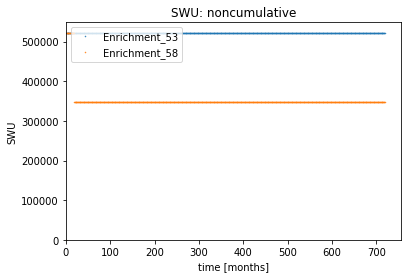

In [9]:
analysis.plot_swu(cur,False)

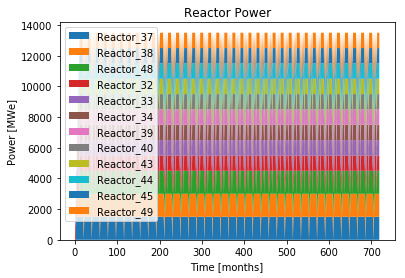

In [10]:
analysis.plot_power_reactor(cur,reactors=[])

After reading and understanding the general structure of the *CYCLUS* output file and how to index within an sql file, you should be able to pull desired data in ways beyond the functions in this tutorial.

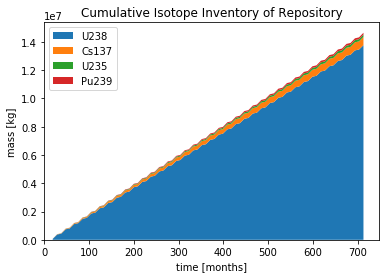

In [11]:
analysis.plot_in_flux_cumulative(cur, 'NuclearRepository','Cumulative Isotope Inventory of Repository')

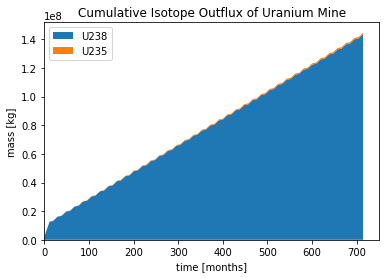

In [12]:
analysis.plot_out_flux_cumulative(cur, 'UraniumMine','Cumulative Isotope Outflux of Uranium Mine')
#analysis.mass_timeseries(cur,'UraniumMine',flux='out')


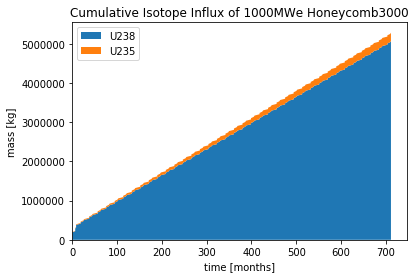

In [13]:
analysis.plot_in_flux_cumulative(cur, '1000MWe Honeycomb3000','Cumulative Isotope Influx of 1000MWe Honeycomb3000')

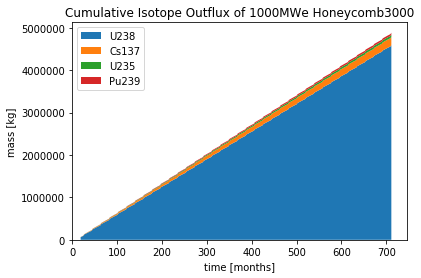

In [14]:
analysis.plot_out_flux_cumulative(cur, '1000MWe Honeycomb3000','Cumulative Isotope Outflux of 1000MWe Honeycomb3000')

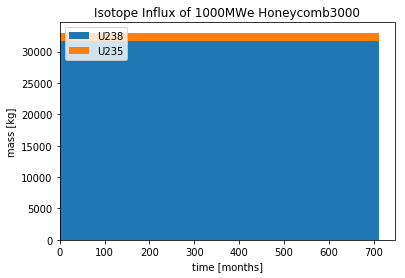

In [15]:
analysis.plot_in_flux_basic(cur, '1000MWe Honeycomb3000','Isotope Influx of 1000MWe Honeycomb3000')

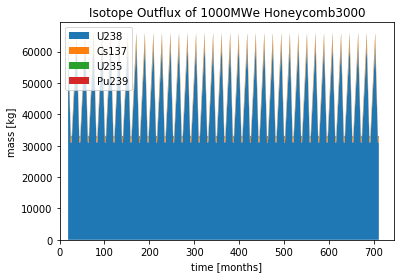

In [16]:
analysis.plot_out_flux_basic(cur, '1000MWe Honeycomb3000','Isotope Outflux of 1000MWe Honeycomb3000')

In [17]:
analysis.prototype_id(cur, 'UraniumMine')

['52', '57']

In [18]:
outputfile = cym.dbopen('singlereactortutorial.sqlite')
evaluate = cym.Evaluator(outputfile)
ev1 = cym.Evaluator(outputfile)


In [19]:
cymetric_analysis.total_isotope_mined(ev,isotopes=[922380000],mines=['UraniumMine'])

143570444.52554709

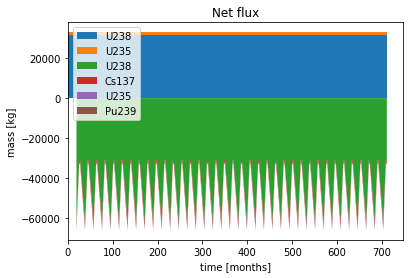

In [20]:
analysis.plot_net_flux(cur,'1000MWe Honeycomb3000','Net flux')
#cymetric_analysis.power_agent_id('singlereactortutorial.sqlite',agentids=[44])

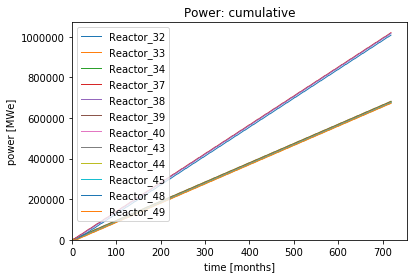

In [21]:
masstime = analysis.mass_timeseries(cur,'1000MWe Honeycomb3000',flux='out')
cymetric_analysis.power_timeseries(ev,agentids=[44])
analysis.plot_power_ot(cur,is_cum=True,is_tot=False)

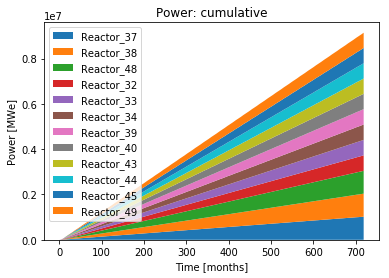

In [22]:
analysis.plot_cumulative_power(cur)

In [23]:
#analysis.plot_power(cur)
#from IPython.display import Image
#Image(filename='power_plot.png')

In [24]:
nat_u = analysis.nat_u_timeseries(cur,is_cum=True)

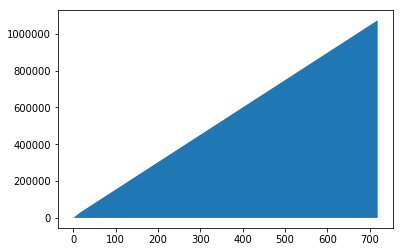

In [25]:
plt.stackplot(np.arange(0,720,1),nat_u)

In [26]:
analysis.fuel_usage_timeseries(cur,fuels=['fresh-uox'],is_cum=True)

OrderedDict([('fresh-uox',
              [0.0,
               198.0,
               198.0,
               396.0,
               396.0,
               594.0,
               594.0,
               792.0,
               792.0,
               990.0,
               990.0,
               1188.0,
               1188.0,
               1188.0,
               1188.0,
               1188.0,
               1188.0,
               1188.0,
               1188.0,
               1254.0,
               1254.0,
               1320.0,
               1320.0,
               1386.0,
               1386.0,
               1452.0,
               1452.0,
               1518.0,
               1518.0,
               1584.0,
               1584.0,
               1584.0,
               1584.0,
               1584.0,
               1584.0,
               1584.0,
               1584.0,
               1584.0,
               1650.0,
               1650.0,
               1716.0,
               1716.0,
               1782.